In [1]:
%matplotlib inline

In [2]:
from firedrake import tricontourf

In [3]:
import adolc
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from adapt_utils.case_studies.tohoku.options.okada_options import TohokuOkadaBasisOptions
from adapt_utils.unsteady.solver import AdaptiveProblem
from adapt_utils.unsteady.swe.tsunami.conversion import lonlat_to_utm

In [18]:
plt.rc('font', **{'size': 16})

In [5]:
kwargs = {
    'level': 1,
    'debug': True,
    'okada_grid_lon_min': 140,
    'okada_grid_lon_max': 145,
    'okada_grid_lat_min': 35,
    'okada_grid_lat_max': 41,
}
plotting_kwargs = {
    'cmap': 'coolwarm',
    'levels': 50,
}

In [6]:
op = TohokuOkadaBasisOptions(**kwargs)

INIT: Loading mesh...
INIT: Checking validity of gauge coordinates...


In [7]:
swp = AdaptiveProblem(op, nonlinear=False, print_progress=False)
swp.set_initial_condition(annotate_source=False)

********************************************************************************
AdaptiveProblem initialisation begin
********************************************************************************

SETUP: Setting default meshes...
SETUP: Mesh 0 has 62626 elements and 32096 vertices
SETUP: Creating finite elements...
SETUP: Creating function spaces...
SETUP: Creating solutions...
SETUP: Creating fields...
INIT: Reading bathymetry file...
INIT: Creating bathymetry interpolator...
INIT: Interpolating bathymetry...
INIT: Capping bathymetry...
INIT: Computing CFL number on mesh 0...
INIT:   dx = 2.0138e+03  dt = 3.0000e+01  CFL number = 4.5998e+00 > 1
SETUP: Setting stabilisation parameters...
SETUP: Setting boundary conditions...
SETUP: Creating output files...
Subfault 0: shear modulus 4.0e+10 Pa, seismic moment is 2.1e+17
Subfault 1: shear modulus 4.0e+10 Pa, seismic moment is 6.4e+19
Subfault 2: shear modulus 4.0e+10 Pa, seismic moment is 1.2e+20
Subfault 3: shear modulus 4.0e+10 Pa, 

Subfault 115: shear modulus 4.0e+10 Pa, seismic moment is 1.7e+20
Subfault 116: shear modulus 4.0e+10 Pa, seismic moment is 1.2e+20
Subfault 117: shear modulus 4.0e+10 Pa, seismic moment is 1.2e+19
Subfault 118: shear modulus 4.0e+10 Pa, seismic moment is 9.9e+17
Subfault 119: shear modulus 4.0e+10 Pa, seismic moment is 1.4e+20
Subfault 120: shear modulus 4.0e+10 Pa, seismic moment is 6.8e+19
Subfault 121: shear modulus 4.0e+10 Pa, seismic moment is 2.1e+20
Subfault 122: shear modulus 4.0e+10 Pa, seismic moment is 3.6e+20
Subfault 123: shear modulus 4.0e+10 Pa, seismic moment is 4.1e+20
Subfault 124: shear modulus 4.0e+10 Pa, seismic moment is 4.3e+20
Subfault 125: shear modulus 4.0e+10 Pa, seismic moment is 2.0e+20
Subfault 126: shear modulus 4.0e+10 Pa, seismic moment is 8.0e+19
Subfault 127: shear modulus 4.0e+10 Pa, seismic moment is 4.3e+19
Subfault 128: shear modulus 4.0e+10 Pa, seismic moment is 1.3e+19
Subfault 129: shear modulus 4.0e+10 Pa, seismic moment is 1.3e+19
Subfault 1

created topography for subfault 1/190 (0.0 seconds)
created topography for subfault 11/190 (0.1 seconds)
created topography for subfault 21/190 (0.1 seconds)
created topography for subfault 31/190 (0.1 seconds)
created topography for subfault 41/190 (0.1 seconds)
created topography for subfault 51/190 (0.1 seconds)
created topography for subfault 61/190 (0.1 seconds)
created topography for subfault 71/190 (0.1 seconds)
created topography for subfault 81/190 (0.1 seconds)
created topography for subfault 91/190 (0.0 seconds)
created topography for subfault 101/190 (0.0 seconds)
created topography for subfault 111/190 (0.0 seconds)
created topography for subfault 121/190 (0.1 seconds)
created topography for subfault 131/190 (0.0 seconds)
created topography for subfault 141/190 (0.0 seconds)
created topography for subfault 151/190 (0.0 seconds)
created topography for subfault 161/190 (0.0 seconds)


Fault corresponds to an earthquake with moment magnitude 9.1e+00
INIT: Subtracting initial surface from bathymetry field...
INIT: Interpolating bathymetry...


created topography for subfault 171/190 (0.0 seconds)
created topography for subfault 181/190 (0.0 seconds)


INIT: Capping bathymetry...


In [8]:
kwargs['control_parameters'] = op.control_parameters
mu = 0
sigma = 5
for control in op.active_controls:
    size = np.shape(op.control_parameters[control])
    kwargs['control_parameters'][control] += np.random.normal(loc=mu, scale=sigma, size=size)
op_opt = TohokuOkadaBasisOptions(**kwargs)
for gauge in op_opt.gauges:
    op_opt.gauges[gauge]["data"] = op.gauges[gauge]["data"]

INIT: Loading mesh...
INIT: Checking validity of gauge coordinates...


In [9]:
tape_tag = 0
swp = AdaptiveProblem(op_opt, nonlinear=False, print_progress=False)
swp.set_initial_condition(annotate_source=True, tag=tape_tag)

********************************************************************************
AdaptiveProblem initialisation begin
********************************************************************************

SETUP: Setting default meshes...
SETUP: Mesh 0 has 62626 elements and 32096 vertices
SETUP: Creating finite elements...
SETUP: Creating function spaces...
SETUP: Creating solutions...
SETUP: Creating fields...
INIT: Reading bathymetry file...
INIT: Creating bathymetry interpolator...
INIT: Interpolating bathymetry...
INIT: Capping bathymetry...
INIT: Computing CFL number on mesh 0...
INIT:   dx = 2.0138e+03  dt = 3.0000e+01  CFL number = 4.5998e+00 > 1
SETUP: Setting stabilisation parameters...
SETUP: Setting boundary conditions...
SETUP: Creating output files...
Subfault 0: shear modulus 4.0e+10 Pa, seismic moment is 5.3e+19
Subfault 1: shear modulus 4.0e+10 Pa, seismic moment is 4.3e+17
Subfault 2: shear modulus 4.0e+10 Pa, seismic moment is 5.2e+19
Subfault 3: shear modulus 4.0e+10 Pa, 

Subfault 115: shear modulus 4.0e+10 Pa, seismic moment is 2.2e+20
Subfault 116: shear modulus 4.0e+10 Pa, seismic moment is 1.9e+20
Subfault 117: shear modulus 4.0e+10 Pa, seismic moment is 6.0e+18
Subfault 118: shear modulus 4.0e+10 Pa, seismic moment is 1.8e+19
Subfault 119: shear modulus 4.0e+10 Pa, seismic moment is 2.1e+20
Subfault 120: shear modulus 4.0e+10 Pa, seismic moment is 1.1e+20
Subfault 121: shear modulus 4.0e+10 Pa, seismic moment is 1.9e+20
Subfault 122: shear modulus 4.0e+10 Pa, seismic moment is 4.0e+20
Subfault 123: shear modulus 4.0e+10 Pa, seismic moment is 3.6e+20
Subfault 124: shear modulus 4.0e+10 Pa, seismic moment is 3.7e+20
Subfault 125: shear modulus 4.0e+10 Pa, seismic moment is 2.2e+20
Subfault 126: shear modulus 4.0e+10 Pa, seismic moment is 2.2e+20
Subfault 127: shear modulus 4.0e+10 Pa, seismic moment is 2.5e+20
Subfault 128: shear modulus 4.0e+10 Pa, seismic moment is 1.7e+19
Subfault 129: shear modulus 4.0e+10 Pa, seismic moment is 1.4e+20
Subfault 1

created topography for subfault 1/190 (1.2 seconds)
created topography for subfault 11/190 (8.5 seconds)
created topography for subfault 21/190 (8.3 seconds)
created topography for subfault 31/190 (8.7 seconds)
created topography for subfault 41/190 (9.2 seconds)
created topography for subfault 51/190 (8.5 seconds)
created topography for subfault 61/190 (8.7 seconds)
created topography for subfault 71/190 (9.0 seconds)
created topography for subfault 81/190 (8.7 seconds)
created topography for subfault 91/190 (8.9 seconds)
created topography for subfault 101/190 (8.8 seconds)
created topography for subfault 111/190 (8.7 seconds)
created topography for subfault 121/190 (9.1 seconds)
created topography for subfault 131/190 (8.5 seconds)
created topography for subfault 141/190 (8.8 seconds)
created topography for subfault 151/190 (9.0 seconds)
created topography for subfault 161/190 (9.0 seconds)
created topography for subfault 171/190 (8.6 seconds)
created topography for subfault 181/190

Fault corresponds to an earthquake with moment magnitude 9.1e+00
INIT: Subtracting initial surface from bathymetry field...
INIT: Interpolating bathymetry...
INIT: Capping bathymetry...


In [21]:
lonlat_corners = [
    (kwargs['okada_grid_lon_min'], kwargs['okada_grid_lat_min']),
    (kwargs['okada_grid_lon_max'], kwargs['okada_grid_lat_min']),
    (kwargs['okada_grid_lon_min'], kwargs['okada_grid_lat_max']),
]
utm_corners = [lonlat_to_utm(*corner, 54) for corner in lonlat_corners]
xlim = [utm_corners[0][0], utm_corners[1][0]]
ylim = [utm_corners[0][1], utm_corners[2][1]]

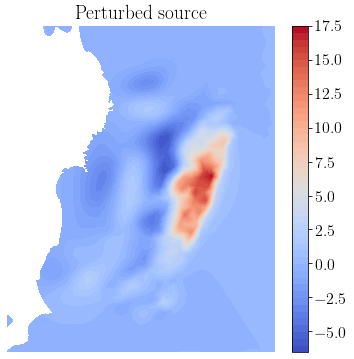

In [22]:
fig, axes = plt.subplots(figsize=(6, 6))
eta = swp.fwd_solutions[0].split()[1].copy(deepcopy=True)
fig.colorbar(tricontourf(eta, axes=axes, cmap='coolwarm', levels=50), ax=axes);
axes.axis(False);
axes.set_title("Perturbed source");
axes.set_xlim(xlim);
axes.set_ylim(ylim);

In [12]:
op_opt.get_input_vector()
op_opt.get_seed_matrices();

In [13]:
N = len(op_opt.indices)

## Test forward propagation

In [14]:
F = adolc.zos_forward(tape_tag, op_opt.input_vector, keep=0)

In [15]:
F = F.reshape(190, N)
F = np.sum(F, axis=0)
dZ_pert = op_opt.fault.dtopo.dZ.reshape(F.shape)
assert np.allclose(dZ_pert, F)

## Test forward mode differentation

In [16]:
F, dFdm = adolc.fov_forward(tape_tag, op_opt.input_vector, op_opt.seed_matrices)

In [17]:
F = F.reshape(190, N)
F = np.sum(F, axis=0)
assert np.allclose(dZ_pert, F)
dFdm = dFdm.reshape(190, N, 4)
print(dFdm.shape)

(190, 2742, 4)


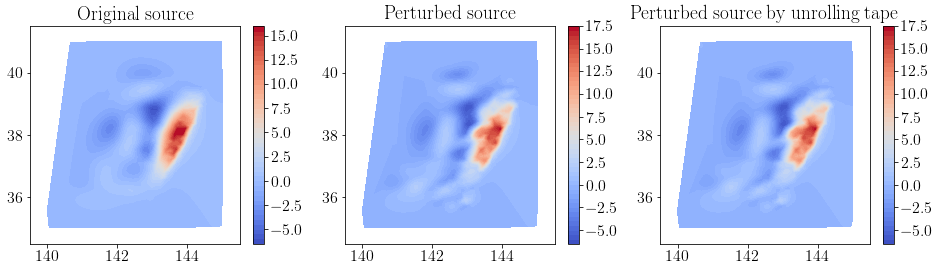

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
X = op.fault.dtopo.X
Y = op.fault.dtopo.Y
dZ = op.fault.dtopo.dZ.reshape(N)
dZ_pert = op_opt.fault.dtopo.dZ.reshape(N)
fig.colorbar(axes[0].tricontourf(X, Y, dZ, **plotting_kwargs), ax=axes[0]);
axes[0].set_title("Original source");
fig.colorbar(axes[1].tricontourf(X, Y, dZ_pert, **plotting_kwargs), ax=axes[1]);
axes[1].set_title("Perturbed source");
fig.colorbar(axes[2].tricontourf(X, Y, F, **plotting_kwargs), ax=axes[2]);
axes[2].set_title("Perturbed source by unrolling tape");
eps = 0.5
for ax in axes:
    ax.set_xlim([lonlat_corners[0][0]-eps, lonlat_corners[1][0]+eps])
    ax.set_ylim([lonlat_corners[0][1]-eps, lonlat_corners[2][1]+eps])